# Fraud Detection

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('/content/creditcard.csv')

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [20]:
df.shape

(213969, 31)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213969 entries, 0 to 213968
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    213969 non-null  float64
 1   V1      213969 non-null  float64
 2   V2      213969 non-null  float64
 3   V3      213969 non-null  float64
 4   V4      213969 non-null  float64
 5   V5      213969 non-null  float64
 6   V6      213968 non-null  float64
 7   V7      213968 non-null  float64
 8   V8      213968 non-null  float64
 9   V9      213968 non-null  float64
 10  V10     213968 non-null  float64
 11  V11     213968 non-null  float64
 12  V12     213968 non-null  float64
 13  V13     213968 non-null  float64
 14  V14     213968 non-null  float64
 15  V15     213968 non-null  float64
 16  V16     213968 non-null  float64
 17  V17     213968 non-null  float64
 18  V18     213968 non-null  float64
 19  V19     213968 non-null  float64
 20  V20     213968 non-null  float64
 21  V21     21

In [22]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,213969.000000,213969.000000,213969.000000,213969.000000,213969.000000,213969.000000,213968.000000,213968.000000,213968.000000,213968.000000,...,213968.000000,213968.000000,213968.000000,213968.000000,213968.000000,213968.000000,213968.000000,213968.000000,213968.000000,213968.000000
mean,74937.598400,-0.081341,-0.005532,0.246788,0.058076,-0.084204,0.039211,-0.036438,0.009684,0.005821,...,-0.010282,-0.033943,-0.012942,0.002552,0.048331,0.004040,0.000510,0.001907,90.219439,0.001860
std,37216.000232,1.913604,1.634721,1.469866,1.405334,1.364320,1.315972,1.218473,1.205105,1.129713,...,0.737983,0.700257,0.618422,0.604733,0.500736,0.487510,0.397955,0.326543,248.693776,0.043089
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,46008.000000,-0.953627,-0.590885,-0.461117,-0.810535,-0.764845,-0.720697,-0.571482,-0.188793,-0.662632,...,-0.226122,-0.534570,-0.167993,-0.345931,-0.258484,-0.331420,-0.068525,-0.045235,6.000000,0.000000
50%,70220.000000,-0.057327,0.074723,0.429846,0.058997,-0.143782,-0.227733,0.001103,0.037626,-0.070478,...,-0.038641,-0.022019,-0.025934,0.049945,0.088828,-0.061800,0.004628,0.017160,23.150000,0.000000
75%,113405.000000,1.229009,0.781213,1.184820,0.860350,0.503138,0.439689,0.519497,0.334459,0.619496,...,0.160474,0.449721,0.121188,0.424691,0.378665,0.256925,0.089067,0.078020,79.800000,0.000000
max,139471.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [25]:
class_counts = df['Class'].value_counts()
class_counts

Class
0.0    213570
1.0       398
Name: count, dtype: int64

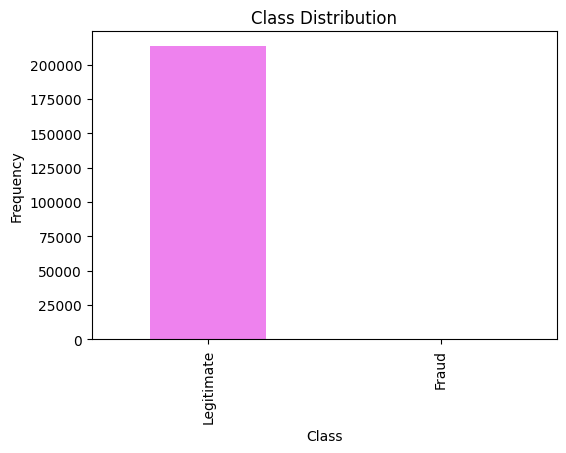

In [27]:
# Plot the class distribution
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=['violet', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.show()

In [28]:
print(df['Amount'].describe())

count    213968.000000
mean         90.219439
std         248.693776
min           0.000000
25%           6.000000
50%          23.150000
75%          79.800000
max       19656.530000
Name: Amount, dtype: float64


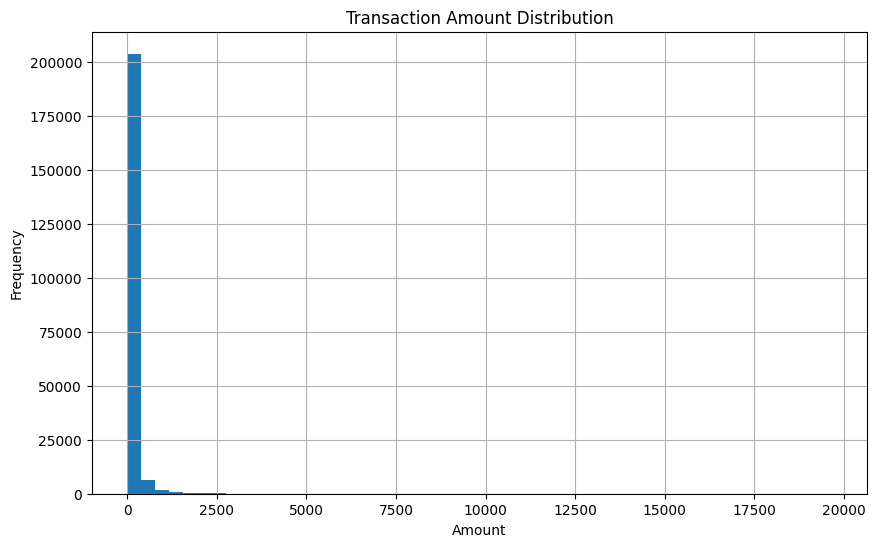

In [29]:
# Plot the distribution of transaction amounts
plt.figure(figsize=(10,6))
df['Amount'].hist(bins=50)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

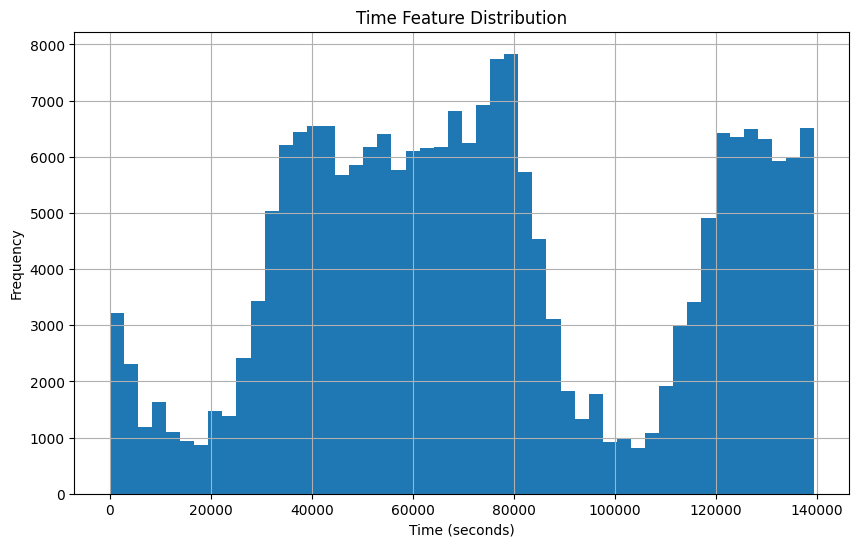

In [44]:
# Plot the distribution of time feature
plt.figure(figsize=(10,6))
df['Time'].hist(bins=50)
plt.title('Time Feature Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

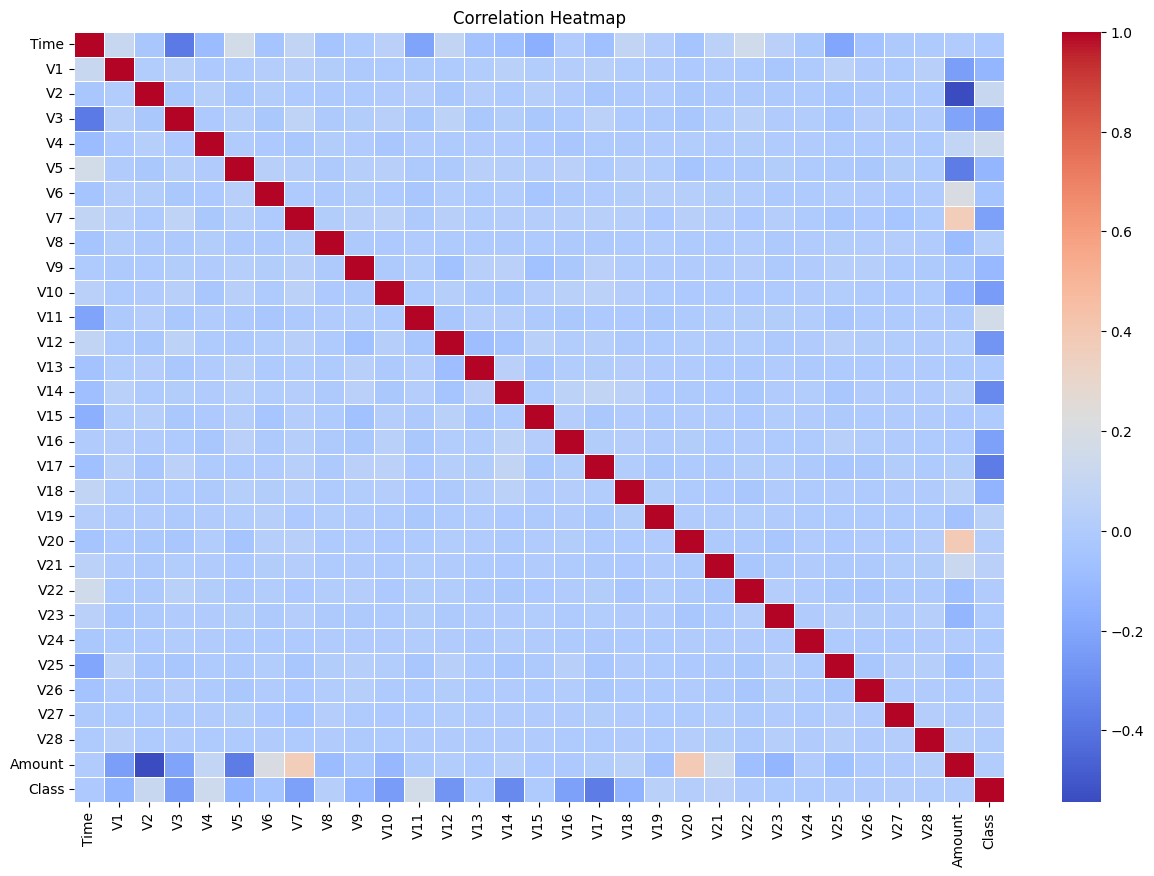

In [45]:
# Plot a correlation heatmap
plt.figure(figsize=(15,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

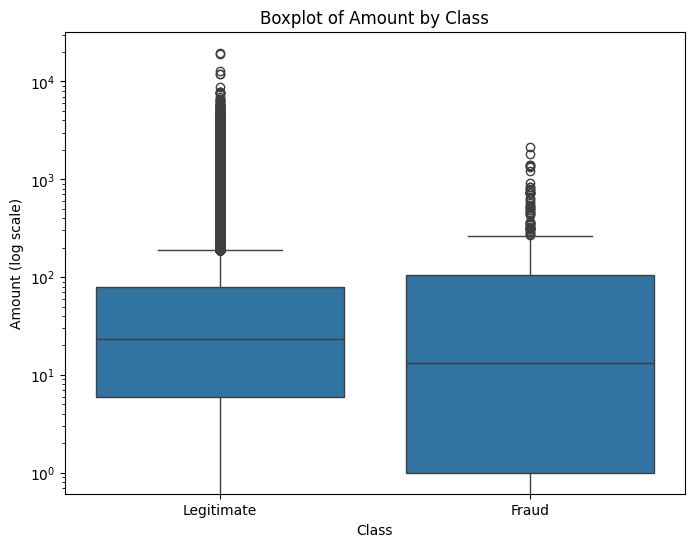

In [46]:
# Boxplot of Amount by Class
plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')
plt.title('Boxplot of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount (log scale)')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.show()

In [32]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [33]:
df.dropna(inplace=True)

In [34]:
# Verify that there are no missing values left
print(df.isnull().sum().sum())

0


In [37]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
# Predict on the test set
y_pred = logreg.predict(X_test)

In [41]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[64053    15]
 [   44    79]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     64068
         1.0       0.84      0.64      0.73       123

    accuracy                           1.00     64191
   macro avg       0.92      0.82      0.86     64191
weighted avg       1.00      1.00      1.00     64191



In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)

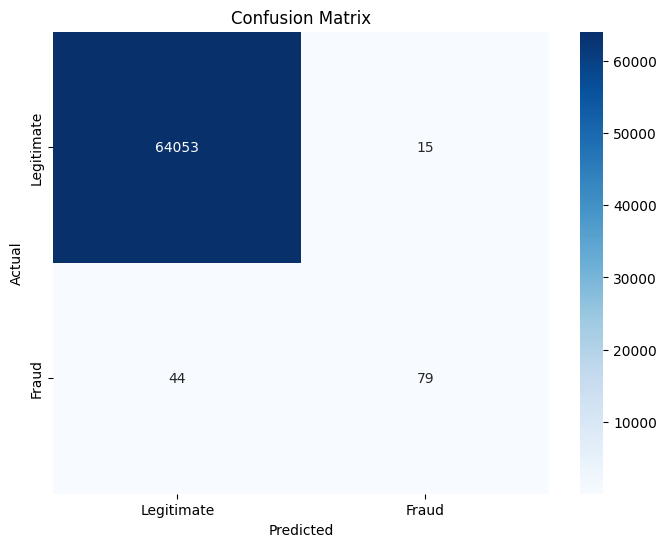

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Train a RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Feature importance
feature_importance = rf.feature_importances_
features = X.columns

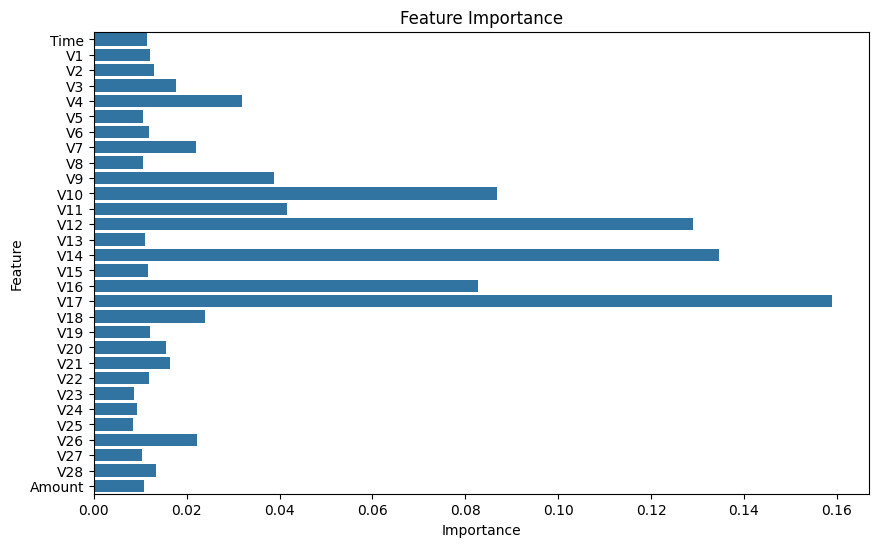

In [51]:
# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [52]:
from sklearn.metrics import roc_curve, auc

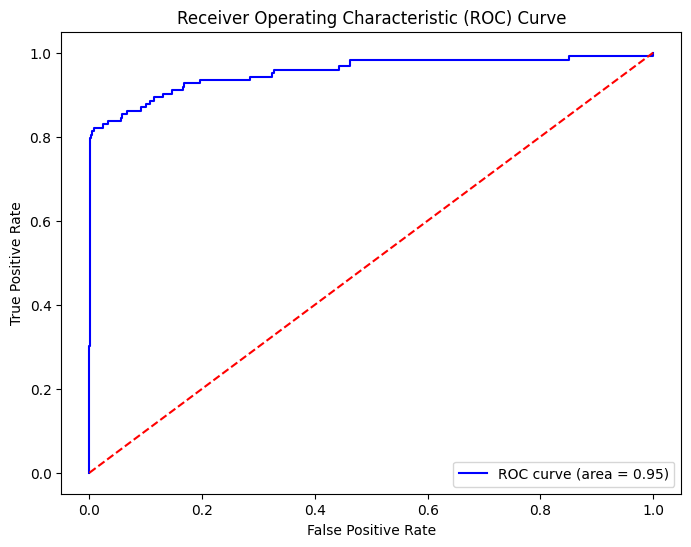

In [54]:
# Plot ROC curve for logistic regression model
logreg_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, logreg_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()